In [1]:
%pylab inline
#import matplotlib as mpl
#mpl.rcParams['mathtext.default'] = 'rm'

Populating the interactive namespace from numpy and matplotlib


In [79]:
import os

In [57]:
#Okay the isochrone python package seems to be worthless for simply plotting an isochrone (somehow)
#So I just grabbed the WFC3 bolometric correction MIST isochrones let's load them in

#   1                               2                               3                               4                               5                               6                               7                               8                   9                  10                  11                  12                  13                  14                  15                  16                  17                  18                  19                  20                  21                  22                  23                  24                  25                  26                  27                  28                  29                  30                  31                  32                  33                  34                  35                  36                  37                  38                  39                  40                  41                  42                  43                  44                  45                  46                  47                  48                  49                  50                  51                  52                  53                  54                  55                  56                  57                  58                  59                  60                  61                  62                  63                  64                  65                  66                  67
# EEP          log10_isochrone_age_yr                    initial_mass                       star_mass                        log_Teff                           log_g                           log_L                     [Fe/H]_init              [Fe/H]    WFC3_UVIS_F200LP     WFC3_UVIS_F218W     WFC3_UVIS_F225W     WFC3_UVIS_F275W     WFC3_UVIS_F280N     WFC3_UVIS_F300X     WFC3_UVIS_F336W     WFC3_UVIS_F343N    WFC3_UVIS_F350LP     WFC3_UVIS_F373N     WFC3_UVIS_F390M     WFC3_UVIS_F390W     WFC3_UVIS_F395N     WFC3_UVIS_F410M     WFC3_UVIS_F438W     WFC3_UVIS_F467M     WFC3_UVIS_F469N     WFC3_UVIS_F475W     WFC3_UVIS_F475X     WFC3_UVIS_F487N     WFC3_UVIS_F502N     WFC3_UVIS_F547M     WFC3_UVIS_F555W    WFC3_UVIS_F600LP     WFC3_UVIS_F606W     WFC3_UVIS_F621M     WFC3_UVIS_F625W     WFC3_UVIS_F631N     WFC3_UVIS_F645N     WFC3_UVIS_F656N     WFC3_UVIS_F657N     WFC3_UVIS_F658N     WFC3_UVIS_F665N     WFC3_UVIS_F673N     WFC3_UVIS_F680N     WFC3_UVIS_F689M     WFC3_UVIS_F763M     WFC3_UVIS_F775W     WFC3_UVIS_F814W     WFC3_UVIS_F845M    WFC3_UVIS_F850LP     WFC3_UVIS_F953N       WFC3_IR_F098M       WFC3_IR_F105W       WFC3_IR_F110W       WFC3_IR_F125W       WFC3_IR_F126N       WFC3_IR_F127M       WFC3_IR_F128N       WFC3_IR_F130N       WFC3_IR_F132N       WFC3_IR_F139M       WFC3_IR_F140W       WFC3_IR_F153M       WFC3_IR_F160W       WFC3_IR_F164N       WFC3_IR_F167N               phase

iso_test = np.loadtxt('./MIST_v1.2_vvcrit0.0_HST_WFC3/MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd')


In [58]:
#Relevant columns 
#0 - EEP?
#1 - age (log10 yrs)
#2 - inital mass
#3 - star mass
#4 - log Teff
#5 - log g
#6 - log L
#7 - Fe/H init
#8 - Fe/H

#12 - WFC3_F275w
#15 - F336w
#23 - F438w
#47 - F814w

mist_age = iso_test[:,1]
mist_feh_ini = iso_test[:,7]
mist_feh = iso_test[:,8]
mist_f275w = iso_test[:,12]
mist_f336w = iso_test[:,15]
mist_f438w = iso_test[:,23]
mist_f814w = iso_test[:,47]

In [65]:
print(np.unique(mist_age)[::10])
#print(np.unique(mist_feh_ini))
#print(np.unique(mist_feh))

[ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10. ]


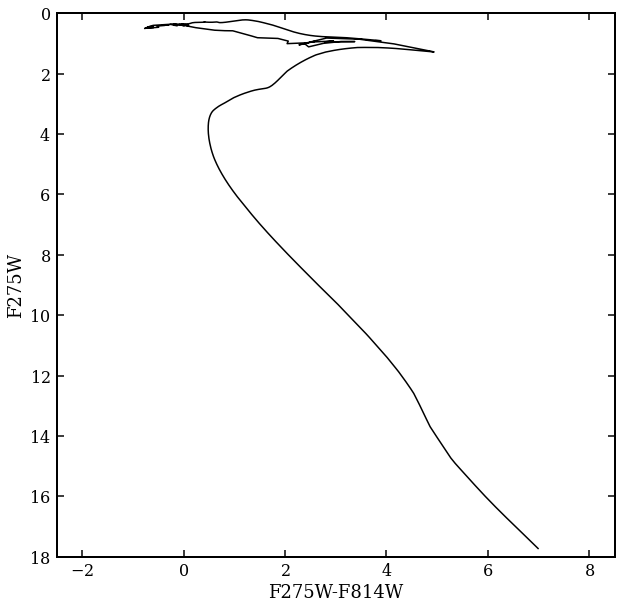

In [55]:
mask_age = (mist_age==10.05)

fig1 = figure(1,(10,10))
plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
#plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.xlim([-2.5,8.5])
plt.ylim([18,0])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

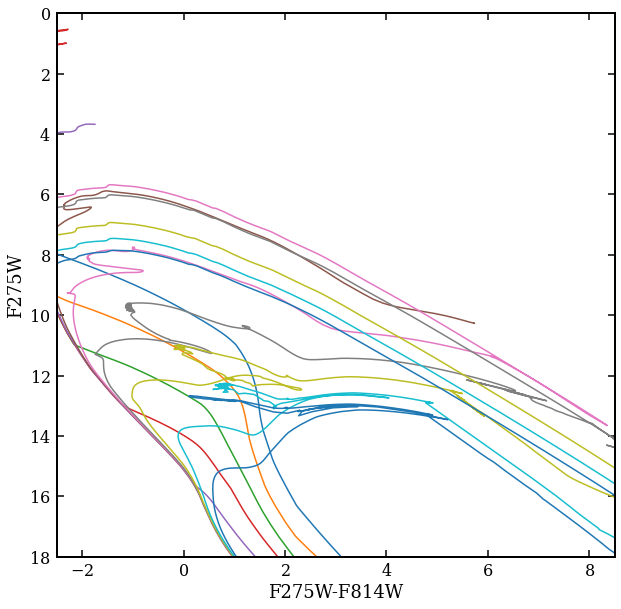

In [68]:
fig1 = figure(1,(10,10))

for age_select in np.unique(mist_age)[::10]:
    mask_age = (mist_age==age_select)

    plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age]+12.)

#plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.xlim([-2.5,8.5])
plt.ylim([18,0])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_iso_minus_three.cmd
MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd
MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.0_HST_WFC3.iso.cmd


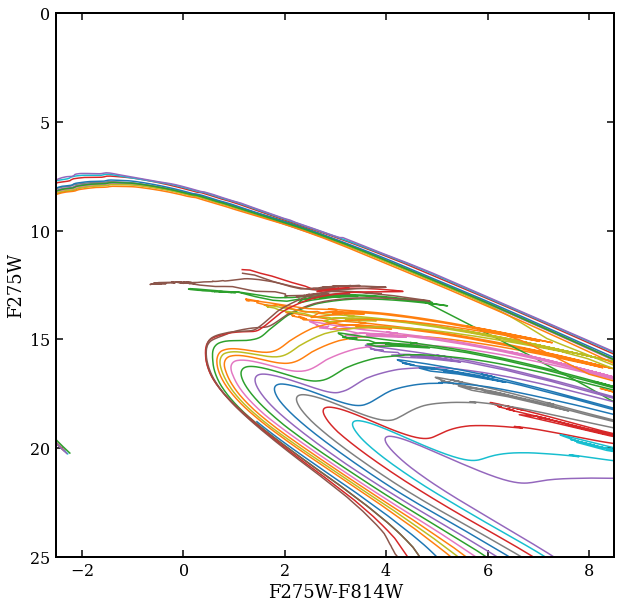

In [85]:
for mist_file in os.listdir('./MIST_v1.2_vvcrit0.0_HST_WFC3/'):
    if mist_file.startswith('MIST'):
        print(mist_file)

        iso_test = np.loadtxt('./MIST_v1.2_vvcrit0.0_HST_WFC3/'+mist_file)

        mist_age = iso_test[:,1]
        mist_feh_ini = iso_test[:,7]
        mist_feh = iso_test[:,8]
        mist_f275w = iso_test[:,12]
        mist_f336w = iso_test[:,15]
        mist_f438w = iso_test[:,23]
        mist_f814w = iso_test[:,47]

        fig1 = figure(1,(10,10))

        mask_age = (mist_age==10.0)

        plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age]+12.)

#plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.xlim([-2.5,8.5])
plt.ylim([25,0])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd
MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_HST_WFC3.iso.cmd


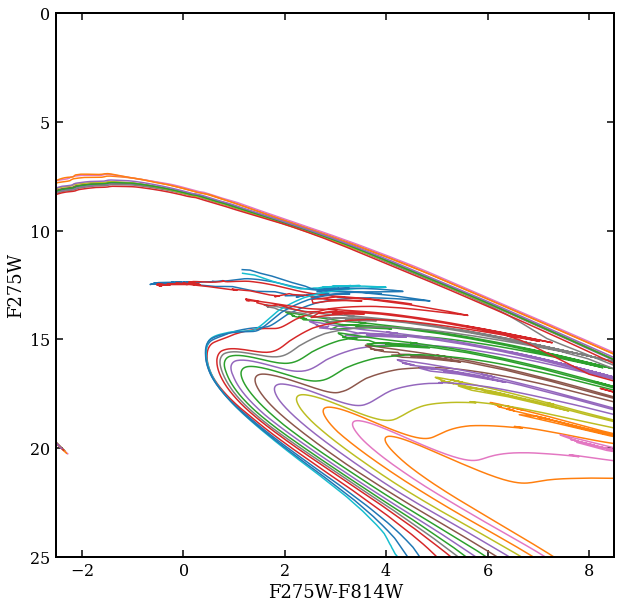

In [86]:
for mist_file in os.listdir('./MIST_v1.2_vvcrit0.4_HST_WFC3//'):
    if mist_file.startswith('MIST'):
        print(mist_file)

        iso_test = np.loadtxt('./MIST_v1.2_vvcrit0.4_HST_WFC3/'+mist_file)

        mist_age = iso_test[:,1]
        mist_feh_ini = iso_test[:,7]
        mist_feh = iso_test[:,8]
        mist_f275w = iso_test[:,12]
        mist_f336w = iso_test[:,15]
        mist_f438w = iso_test[:,23]
        mist_f814w = iso_test[:,47]

        fig1 = figure(1,(10,10))

        mask_age = (mist_age==10.0)

        plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age]+12.)

#plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.xlim([-2.5,8.5])
plt.ylim([25,0])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

In [52]:
f = np.loadtxt('./Hugs_photometry/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc2808_multi_v1_catalog-meth1.txt',
              dtype=object)

343134 22604 203744


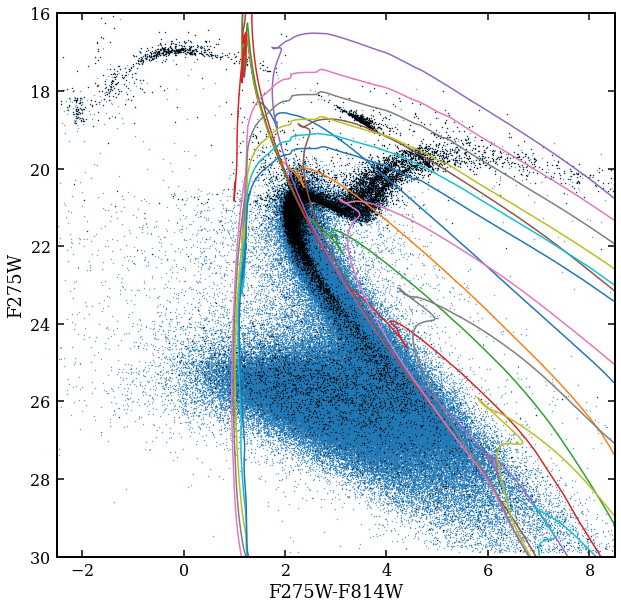

In [118]:
F275 = np.array(f[:,2],dtype=float)
F336 = np.array(f[:,8],dtype=float)
F438 = np.array(f[:,14],dtype=float)
F606 = np.array(f[:,21],dtype=float)
F814 = np.array(f[:,26],dtype=float)

F275_RMS = np.array(f[:,3],dtype=float)
F336_RMS = np.array(f[:,9],dtype=float)
F438_RMS = np.array(f[:,15],dtype=float)
F606_RMS = np.array(f[:,22],dtype=float)
F814_RMS = np.array(f[:,27],dtype=float)

#now I need to mask out the weird values (photometry set to -99.99999) and stars with
#large errors F275W > 0.03, F336W > 0.03, F438W > 0.02
obs_mask = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)&(F275_RMS<0.03)&(F336_RMS<0.03)&(F438_RMS<0.02)
obs_mask_no_err = (F275>-99.0)&(F336>-99.0)&(F438>-99.0)&(F606>-99.0)&(F814>-99.0)

print(len(F275),np.sum(obs_mask),np.sum(obs_mask_no_err))

F275_orig = F275.copy()
F336_orig = F336.copy()
F438_orig = F438.copy()
F606_orig = F606.copy()
F814_orig = F814.copy()

F275 = F275[obs_mask]
F336 = F336[obs_mask]
F438 = F438[obs_mask]
F606 = F606[obs_mask]
F814 = F814[obs_mask]

fig1 = figure(1,(10,10))

for age_select in np.unique(mist_age)[::10]:
    mask_age = (mist_age==age_select)

    plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age]+18.)

plt.scatter(F275_orig-F814_orig,F275_orig,color='C0',s=0.1)
plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
plt.xlim([-2.5,8.5])
plt.ylim([30,16])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

In [ ]:
#This seems to be potentially the effect of reddening??, Also from the Oliviera et al. paper could need Alpha
#enhanced isochrones.



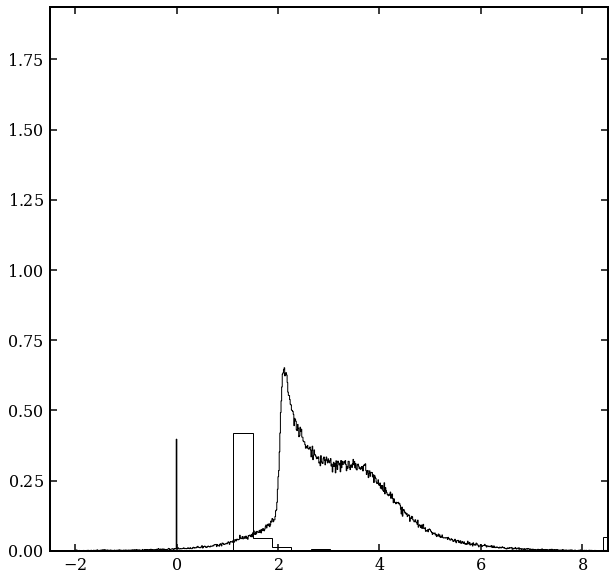

In [117]:
iso_test = np.loadtxt('./MIST_v1.2_feh0.3_Av_3.cmd')

mist_age = iso_test[:,1]
mist_feh_ini = iso_test[:,7]
mist_feh = iso_test[:,8]
mist_f275w = iso_test[:,12]
mist_f336w = iso_test[:,15]
mist_f438w = iso_test[:,23]
mist_f814w = iso_test[:,47]


mask_age = (mist_age==10.3)
#print(np.unique(mist_age))

fig1 = figure(1,(10,10))
plt.hist(mist_f275w[mask_age]-mist_f814w[mask_age],bins=25,color='k',histtype='step',density=True)
plt.hist(F275_orig-F814_orig,bins=np.linspace(-2.0,10.0,1000),color='k',histtype='step',density=True)
plt.xlim([-2.5,8.5])
plt.show()

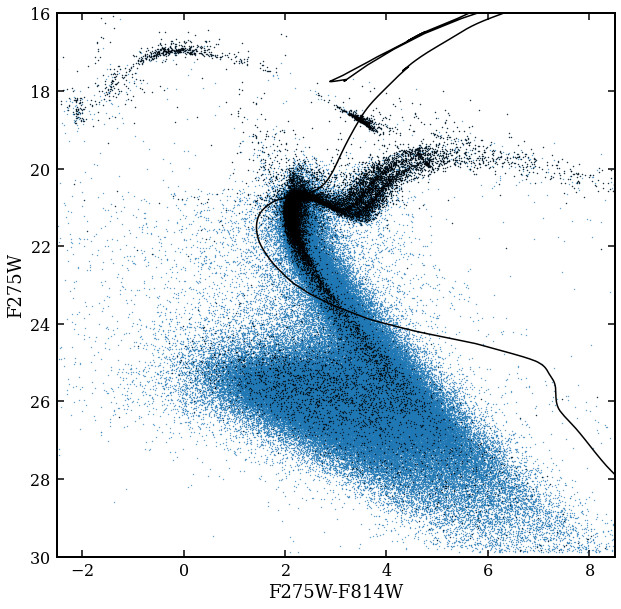

In [124]:
#Lets try out the Basti isochrones which is what the HST UV legacy survey of clusters
#used for their isochrone analysis paper

f_basti = np.loadtxt('./Basti_isochrones/FEHm105/10000z303y275p04o1d1e1.isc_wfc3')

basti_f275w = f_basti[:,6]
basti_f336w = f_basti[:,7]
basti_f438w = f_basti[:,9]
basti_f814w = f_basti[:,15]

fig1 = figure(1,(10,10))

plt.plot(basti_f275w-basti_f814w, basti_f814w+18,color='k')

plt.scatter(F275_orig-F814_orig,F275_orig,color='C0',s=0.1)
plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
plt.xlim([-2.5,8.5])
plt.ylim([30,16])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()

In [149]:
ages_list = []

for basti_file in os.listdir('./Basti_isochrones/FEHm105/'):
    file_footer = basti_file.split('z')[1]
    ages_list.append(float(basti_file.split('z')[0])/1000.0)
    
final_ages_list = np.sort(ages_list)[::20]
print(final_ages_list)

[ 0.9  2.8  4.8  6.8  8.8 10.8 12.8 14.8 16.8 18.8 20.8]


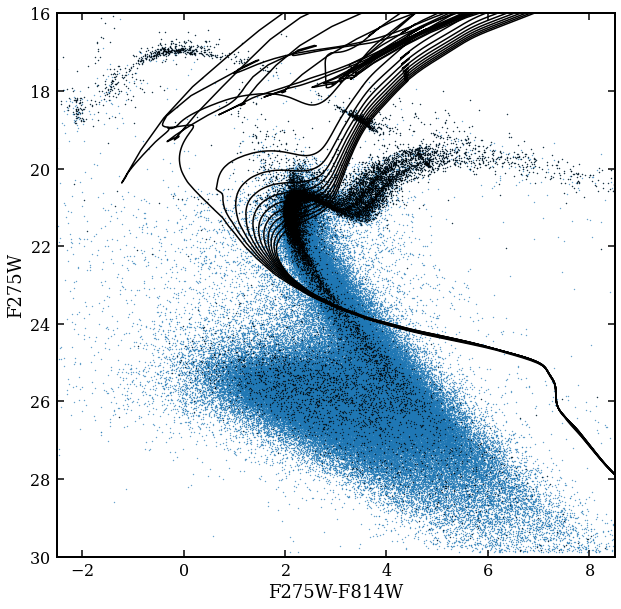

In [150]:
fig1 = figure(1,(10,10))

for age_value in final_ages_list:
    file_name = str(int(age_value*1000.))+'z'+file_footer
    
    f_basti = np.loadtxt('./Basti_isochrones/FEHm105/'+file_name)

    basti_f275w = f_basti[:,6]
    basti_f336w = f_basti[:,7]
    basti_f438w = f_basti[:,9]
    basti_f814w = f_basti[:,15]
    
    plt.plot(basti_f275w-basti_f814w, basti_f814w+18,color='k')

plt.scatter(F275_orig-F814_orig,F275_orig,color='C0',s=0.1)
plt.scatter(F275-F814,F275,color='k',s=0.1)
plt.plot(mist_f275w[mask_age]-mist_f814w[mask_age],mist_f275w[mask_age],color='k')
plt.xlim([-2.5,8.5])
plt.ylim([30,16])
plt.xlabel('F275W-F814W')
plt.ylabel('F275W')
plt.show()